# 10.0 Stratified Dataset
- The training dataset is highly unbalance where default class makes up around 8% of the total. To combat this unbalance I decided to use under-sampling so that the target class (0-non-defaults and 1-defaults) can be represented more equally.
- I decided to use under-sampling versus over-sampling because I have a large dataset.
- To perform the under-sampling I use sklearn's StratifiedShuffleSplit.
- The AMT_ANNUITY field was used to create a category field that served as the stratifying class.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## 10.1 Import Combined Dataset
- The combined dataset contains all the pre-processed datasets.
- In order to stratified I created a category field from the AMT_ANNUITY field to serve as the percentage sampling class. I chose the AMT_ANNUITY field because its normaly distributed.

In [2]:
dataset =  pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_9_combined_dataset.csv")

In [3]:
dataset.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_3,...,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,12.218500,12.915581,10.114619,0.018626,116.108148,0.458496,2.0,-1134.0,0.378018,0.438680,...,0,0,1.0,Cash loans,M,N,Working,Secondary / secondary special,Single / not married,House / apartment
1,12.506181,14.072865,10.482892,0.003535,65.611392,0.427346,0.0,-828.0,0.481033,0.567522,...,0,0,0.0,Cash loans,F,N,State servant,Higher education,Married,House / apartment
2,11.119898,11.813037,8.817446,0.009982,125.560926,0.479428,0.0,-815.0,0.477903,0.502131,...,0,0,0.0,Revolving loans,M,Y,Working,Secondary / secondary special,Single / not married,House / apartment
3,11.813037,12.652947,10.298481,0.007987,191.223222,0.483162,0.0,-617.0,0.475684,0.470818,...,0,0,0.0,Cash loans,F,N,Working,Secondary / secondary special,Civil marriage,House / apartment
4,11.707678,13.148033,9.992711,0.028260,126.316788,0.465227,0.0,-1106.0,0.509719,0.476514,...,0,1,0.0,Cash loans,M,N,Working,Secondary / secondary special,Single / not married,House / apartment


In [4]:
dataset.shape

(344610, 256)

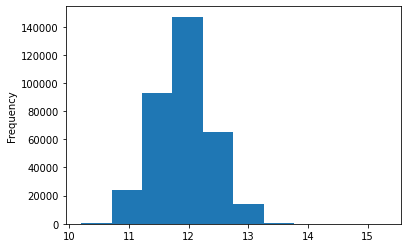

In [3]:
#create stratifying field
strat_field = 'AMT_INCOME_TOTAL'

#show its distribution
dataset[strat_field].plot.hist()
plt.show()

In [4]:
strat_column = strat_field + "_GROUP"

dataset[strat_column] = dataset[strat_field].apply(lambda x:int(  round(x)))
dataset[strat_column] = dataset[strat_column].apply(lambda x: 14 if x==15 else x)
dataset[strat_column].value_counts().sort_index()

10        84
11     64238
12    238024
13     42160
14       104
Name: AMT_INCOME_TOTAL_GROUP, dtype: int64

In [5]:
train_df = dataset[dataset.TARGET.isna() == False]
test_df = dataset[dataset.TARGET.isna() == True]

In [8]:
print(train_df.shape)
print(test_df.shape)

(295966, 257)
(48644, 257)


In [6]:
#def fun summarize the percentages of 1 and 0 target values.
def target_percent(df):
    percent_df =  df.groupby('TARGET').size().to_frame()
    percent_df.columns = ['Count'] 
    percent_df['Percent'] = percent_df['Count'].apply(lambda x : round(100*float(x) / len(df), 2))
    return percent_df

In [10]:
target_percent(train_df)

,Count,Percent
TARGET,,
0.0,271982,91.9
1.0,23984,8.1


## 10.2 Stratified Dataset

In [7]:
def stratified_dataset(df,test_size):
    """ Perform stratification and return test index"""
    
    # split between target value 1 and 0
    non_defaults = df[df['TARGET']==0].copy().reset_index(drop=True)
    defaults = df[df['TARGET']==1].copy().reset_index(drop=True)
    
    X = non_defaults.drop([strat_column], axis=1).values
    y = non_defaults[strat_column].values
    
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=54)
    splits = list(sss.split(X, y))
    
    new_df = non_defaults.iloc[splits[0][1]].copy()
    new_df = new_df.append(defaults).reset_index(drop=True)
    
    return new_df

In [8]:
#create new stratified dataset 
stratified_df =  stratified_dataset(train_df,0.09)

In [13]:
target_percent(stratified_df)

,Count,Percent
TARGET,,
0.0,24479,50.51
1.0,23984,49.49


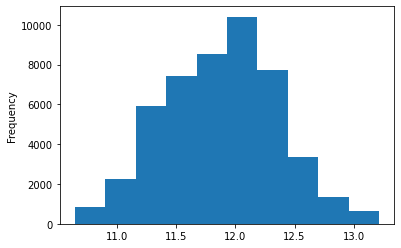

In [14]:
stratified_df[strat_field].plot.hist()
plt.show()

## 10.3 Save Stratified Training and Testing Datasets
- Here we save the stratified training and testing datasets to file
- These two datasets have not been normalized or one-hot-encoded.
- To save test datase we exclude the TARGET field before saving.

In [15]:
# stratified_df.drop([strat_column],axis=1).to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\train.csv',index=False)
# print("Stratified training dataset saved with row count of {}.".format(len(stratified_df)))

In [16]:
# test_df.drop(['TARGET',strat_column],axis=1).to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\test.csv',index=False)
# print("Testing dataset saved with row count of {}.".format(len(test_df)))

## 10.4 Save Normalized Training and Testing Datasets
- Here we save normalized or one-hot-encoded stratified training and testing datasets to file.

Normalize Steps:
- First we normalized the float features.
- Then we one-hot-encode all the integer and string features.
- For convenience and simplicity before one-hot-encoding the string features we convert all string features into integers value. We convert each value in a string feature by assigning an integer to each unique string value.

Saving Steps:
- To save test datase we exclude the TARGET field before saving.

In [9]:
stratified_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_3,...,FLAG_DOCUMENT_8,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL_GROUP
0,11.502885,12.558140,9.544274,0.019498,140.690007,0.224974,1.0,-434.0,0.244921,0.272134,...,0,0.0,Cash loans,M,Y,Working,Secondary / secondary special,Single / not married,With parents,12
1,11.967187,12.710209,10.435791,0.011590,102.776196,0.688328,0.0,-2141.0,0.431378,0.473633,...,0,0.0,Cash loans,F,N,Working,Secondary / secondary special,Married,House / apartment,12
2,12.419170,14.540247,10.905056,0.045184,98.891775,0.702979,0.0,-271.0,0.920529,0.499272,...,0,0.0,Cash loans,F,N,Working,Higher education,Married,House / apartment,12
3,12.382129,13.422469,11.146150,0.019498,156.480692,0.663500,0.0,-555.0,0.334927,0.816092,...,1,0.0,Cash loans,M,Y,Working,Secondary / secondary special,Married,House / apartment,12
4,11.119898,13.569509,10.778258,0.010587,41.944705,0.377285,0.0,-818.0,0.723449,0.649620,...,0,0.0,Cash loans,F,N,Working,Secondary / secondary special,Married,House / apartment,11


In [10]:
stratified_df = stratified_df.drop([strat_column], axis=1)
test_df = test_df.drop([strat_column], axis=1)

In [11]:
train_df = stratified_df.copy()

In [20]:
print(train_df.shape)
print(test_df.shape)

(48463, 256)
(48644, 256)


### 10.4.1 Normalize float columns

In [12]:
float_col = train_df.select_dtypes(['float']).columns
for feature in float_col:
    #first normalize training dataset
    #get ids of training datasets
    ids_train = train_df[feature].index.values
    
    #perform standarization
    vals_train = train_df[feature].values.reshape(-1, 1)
    
    scaler = StandardScaler()
    scaler.fit(vals_train)
    # scaler = StandardScaler().fit(vals_train)
    x_train = scaler.transform(vals_train)

    #update training values
    X_update_train = pd.DataFrame(x_train.flatten(), columns=[feature], index=ids_train)
    train_df.update(X_update_train)

    #now update test set using lmbda from training set
    ids_test = test_df[feature].index.values
    vals_test = test_df[feature].values.reshape(-1, 1)
    x_test = scaler.transform(vals_test)

    #update training values
    X_update_test = pd.DataFrame(x_test.flatten(), columns=[feature], index=ids_test)
    test_df.update(X_update_test)

In [13]:
train_data = train_df.copy()
test_data = test_df.copy()

In [14]:
# let combined the stratified training and testing to then pass to the normalizing object
new_dataset = train_df.append(test_df, ignore_index=True).reset_index(drop=True)

In [15]:
new_dataset.shape

(97107, 256)

### 10.4.2 One_hot_encoder for integer and string columns

In [16]:
int_col = new_dataset.select_dtypes(['integer']).columns

In [17]:
int_table = new_dataset[int_col]

In [21]:
int_table.drop(['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'],axis= 1, inplace=True)

C:\miniconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
int_table

,RETIRED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,0,1,1,0,2,2,15,0,0,0,0,1,0,0
1,0,1,0,0,1,1,12,1,0,0,0,1,0,0
2,0,1,1,1,1,1,10,0,0,1,1,1,0,0
3,0,1,0,0,2,2,9,0,0,0,0,0,0,1
4,0,1,0,0,2,2,13,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97102,0,1,1,1,3,3,16,0,0,0,0,0,0,0
97103,0,1,0,0,2,2,11,0,0,1,1,1,0,0
97104,0,1,0,1,2,2,12,0,0,0,0,1,0,0
97105,0,1,1,1,2,2,10,1,0,1,1,1,0,0


In [31]:
#integer one-hot-encoding
new_dataset = pd.get_dummies(new_dataset, columns = int_table.columns, sparse=True)

In [34]:
other_features = new_dataset.select_dtypes(['object']).columns
# One hot encode all the string fields
drop_features =[]
one_hot_features = []
for f in other_features:
    #get unique values from feature
    idx = new_dataset.groupby(f).size().index
    mapper = {f:i for i,f in enumerate(idx)}
    
    #lets create new map fields
    one_hot = f + "_MAP"
    new_dataset[one_hot] = new_dataset[f].map(mapper)

    drop_features.append(f)
    one_hot_features.append(one_hot)

#lets drop original features 
new_dataset.drop(drop_features,axis=1,inplace=True)

#one-hot-encoding
new_dataset = pd.get_dummies(new_dataset, columns=one_hot_features, sparse=True)

In [38]:
new_dataset.shape

(97107, 322)

## 10.4.3 Save data 

In [39]:
#get train dataframe already filtered
train_norm = new_dataset[new_dataset.TARGET.isna() == False]

#get test dataframe already filtered
test_norm = new_dataset[new_dataset.TARGET.isna() == True]

In [ ]:
#save train dataset to file
train_norm.to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\train_norm.csv',index=False)

#save test dataset to file
test_norm.to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\test_norm.csv',index=False)